# 3章 ニューラルネットワーク

## 3.2 活性化関数

### ステップ関数

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=int)

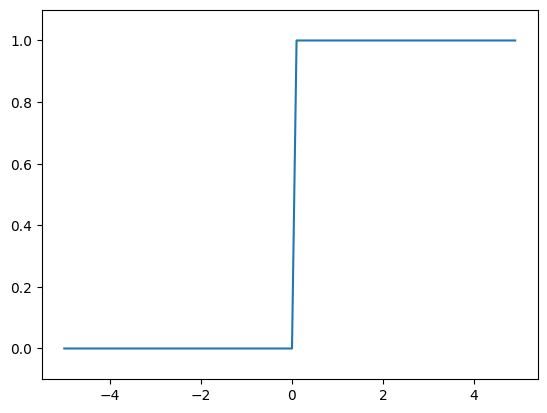

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

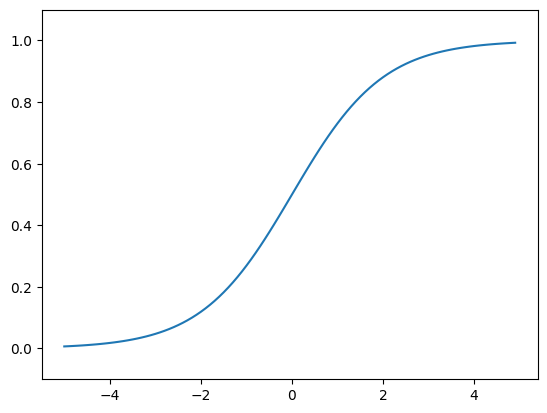

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU関数

In [6]:
def relu(x):
    return np.maximum(0, x)

**NumPyの `max` と `maximum`** 

`numpy.max` は単一の配列内での最大値を見つけるための関数であり、`numpy.maximum` は2つの配列の対応する要素ごとに最大値を計算するための関数です。

```python
import numpy as np

x = np.array([1, 3, 2, 4, 5])
y = np.array([2, 2, 5, 1, 6])
result = np.maximum(x, y)
```

この場合、`result` には `[2, 3, 5, 4, 6]` という要素ごとの最大値が格納されます。

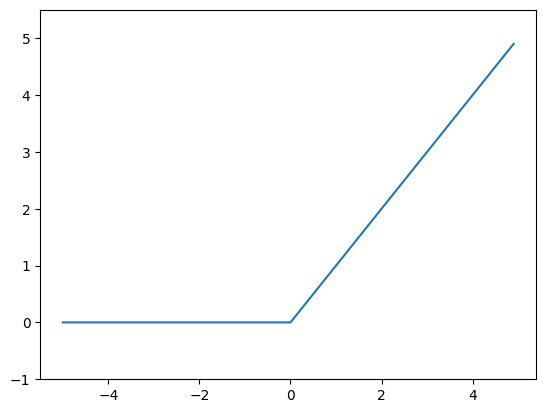

In [7]:
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## 3.3 多次元配列の計算

行列の積 $(2 \times 3) \ (3 \times 2) \rightarrow (2 \times 2)$

In [8]:
A = np.array([[1,2,3], [4,5,6]])
print(f'A.shape = {A.shape}')
B = np.array([[1,2], [3,4], [5,6]])
print(f'B.shape = {B.shape}')
C = np.dot(A,B)
print(f'C.shape = {C.shape}')
C

A.shape = (2, 3)
B.shape = (3, 2)
C.shape = (2, 2)


array([[22, 28],
       [49, 64]])

行列の積 $(3 \times 2) \ (2 \times 1) \rightarrow (3 \times 1)$

In [9]:
A = np.array([[1,2], [3,4], [5,6]])
print(f'A.shape = {A.shape}')
B = np.array([7,8])
print(f'B.shape = {B.shape}')
C = np.dot(A,B)
print(f'C.shape = {C.shape}')
C

A.shape = (3, 2)
B.shape = (2,)
C.shape = (3,)


array([23, 53, 83])

行列の積 $(1 \times 2) \ (2 \times 2) \rightarrow (1 \times 3)$

In [10]:
A = np.array([1,2])
print(f'A.shape = {A.shape}')
B = np.array([[1,3,5], [2,4,6]])
print(f'B.shape = {B.shape}')
C = np.dot(A,B)
print(f'C.shape = {C.shape}')
C

A.shape = (2,)
B.shape = (2, 3)
C.shape = (3,)


array([ 5, 11, 17])

## 3.4 3層ニューラルネットの実装

ニューラルネットの構成 入力$(1,2) \rightarrow (2,3) \rightarrow (3,2) \rightarrow (2,2)$出力

In [11]:
def identity_function(x):
    return x

In [12]:
# ネットワーク定義
def init_network():
    network={}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [13]:
# forword計算
network = init_network()
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 出力層の設計

### 3.5.2 ソフトマックス関数の実装

**オーバーフロー対策**
$$
y_k = \frac{\exp (a_k)}{\displaystyle \sum_{i=1}^n \exp(a_i)} = \frac{C \exp (a_k)}{\displaystyle C \sum_{i=1}^n \exp(a_i)} = \frac{\exp (a_k + \log C)}{\displaystyle \sum_{i=1}^n \exp(a_i + \log C)} = \frac{\exp (a_k + C')}{\displaystyle \sum_{i=1}^n \exp(a_i + C')}
$$

In [14]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [15]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(f'sum = {np.sum(y)}')

[0.01821127 0.24519181 0.73659691]
sum = 1.0


## 3.6 手書き数字認識

### 3.6.1 MNISTデータ

In [25]:
train_images, train_labels, test_images, test_labels = load_mnist(normalize=True, one_hot_label=False, flatten=True)

print("トレーニング画像の形状:", train_images.shape)
print("トレーニングラベルの形状:", train_labels.shape)
print("テスト画像の形状:", test_images.shape)
print("テストラベルの形状:", test_labels.shape)

トレーニング画像の形状: (60000, 784)
トレーニングラベルの形状: (60000,)
テスト画像の形状: (10000, 784)
テストラベルの形状: (10000,)


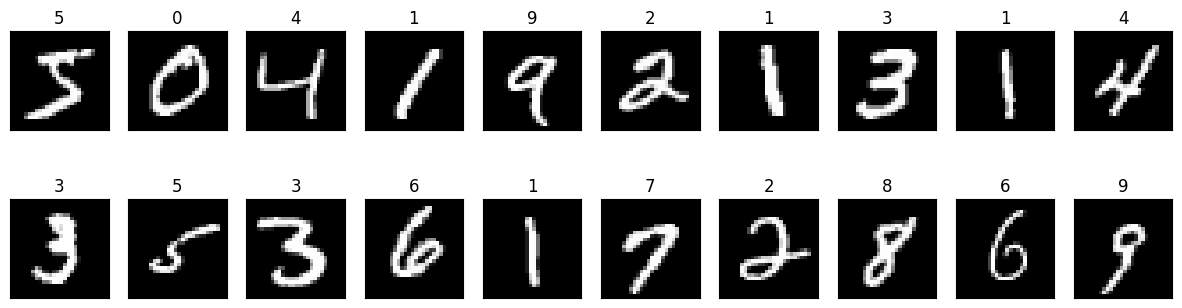

In [17]:
plt.figure(figsize=(15, 4))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    image = train_images[i]
    label = train_labels[i]
    img = image.reshape(28,28)
    plt.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#### one-hotラベルへの変換

In [18]:
# テストラベルの数（クラスの数）を定義
num_classes = 10

# One-Hotエンコーディングを行う関数を定義
def one_hot_encode(labels, num_classes):
    num_labels = len(labels)
    one_hot = np.zeros((num_labels, num_classes))
    one_hot[np.arange(num_labels), labels] = 1
    return one_hot

# テストラベルをOne-Hotエンコーディングに変換
one_hot_test_labels = one_hot_encode(test_labels, num_classes)

# 結果を表示
print(f"元のテストラベル: {test_labels.shape}  値: {test_labels[0]}")
print(f"One-Hotエンコーディングされたテストラベル: {one_hot_test_labels.shape}  値: {one_hot_test_labels[0]}")

元のテストラベル: (10000,)  値: 7
One-Hotエンコーディングされたテストラベル: (10000, 10)  値: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 3.6.2 ニューラルネットワークの推論処理

学習済みのパラメータの読み込み

In [19]:
import pickle

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

パラメータの次元確認

In [20]:
net = init_network()
print(net.keys())
for key in net.keys():
    print(key, net[key].shape)

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
b2 (100,)
W1 (784, 50)
b1 (50,)
W2 (50, 100)
W3 (100, 10)
b3 (10,)


予測関数の定義

In [21]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

精度の計算

In [22]:
accuracy_cnt = 0

for i in range(len(test_images)):
    y = predict(net, test_images[i])
    p = np.argmax(y)
    if p == test_labels[i]:
        accuracy_cnt += 1

print(f'Accuracy: {float(accuracy_cnt)/len(test_labels)}')

Accuracy: 0.9352


### 3.6.3 バッチ処理

In [23]:
accuracy_cnt = 0
batch_size = 100

for i in range(0, len(test_labels), batch_size):
    x_batch = test_images[i:i+batch_size]
    y_batch = predict(net, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == test_labels[i:i+batch_size])

print(f'Accuracy: {float(accuracy_cnt)/len(test_labels)}')

Accuracy: 0.9352
